 # Exercici 1

<b> Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut) 

</b>

Després de la consulta dels 3 webs, hem decidit utilitzar el de Quotes i el de Wikipedia. 
Començarem fent web scraping de la pàgina http://quotes.toscrape.com:

Primerament, hem fet una inspecció de la pàgina web per veure la seva estructura. Aquesta inspecció l'hem fet en cada element de text que volíem obtenir. EL procés és senzill, situant el cursor a sobre de l'element i amb el botó dret seleccionar l'opcó del menú "inspeccionar". Ho podem veure en la imatge següent:

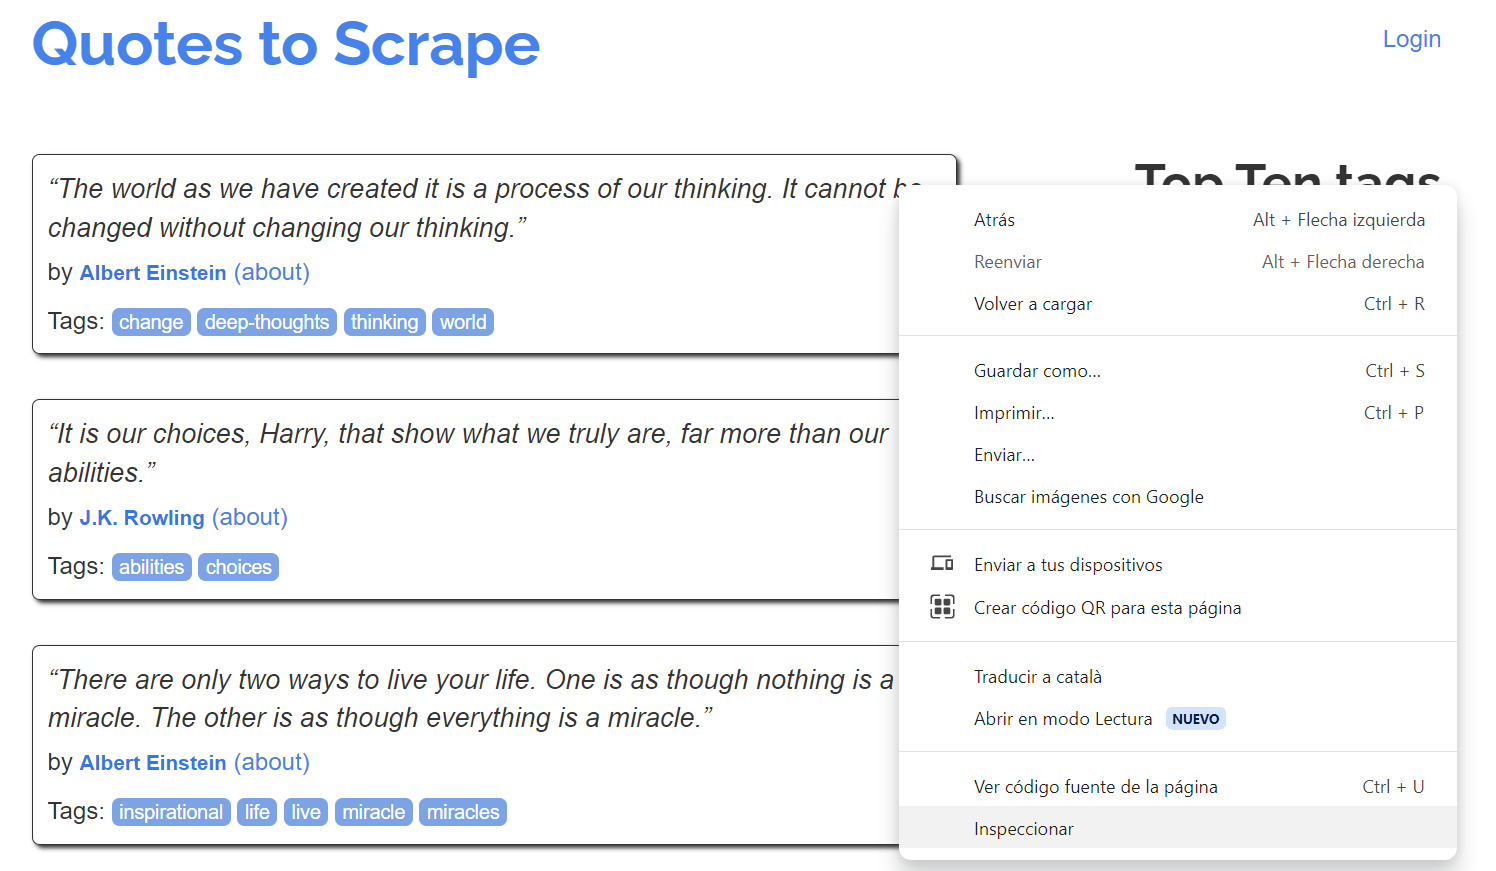

In [7]:
from IPython.display import Image
Image(filename='scraping1.png')

A la dreta de la pantalla podem veure la finestra del "Document Object Model", el qual organitza tots els elements de la pàgina web en una estructura d'arbre, on cada node representa una part diferent de la pàgina (com ara elements HTML, textos i atributs). Aquesta estructura permet als desenvolupadors accedir i modificar de manera programàtica elements específics, canviar estils, afegir o eliminar nodes, i gestionar esdeveniments, entre d'altres funcions. 

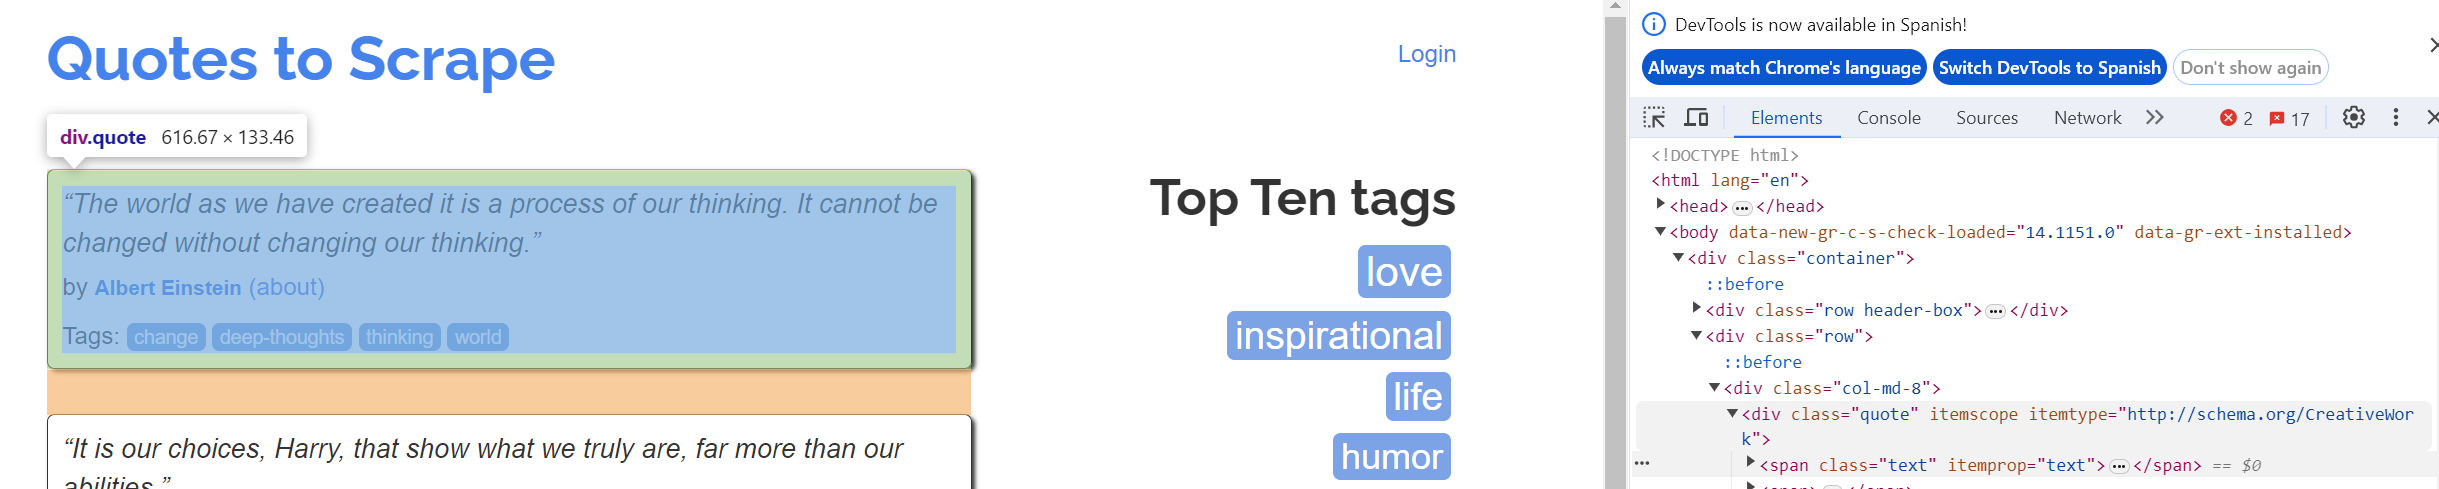

In [8]:
from IPython.display import Image
Image(filename='scraping2.png')

En la imatge anterior podem veure el DOM (Document Object Model), amb els diferents elements de la pàgina web. Quan passem el cursor sobre el codi HTML en eines de desenvolupador o inspeccionem l'element, els components corresponents en la vista de la pàgina queden destacats (en aquest cas en blau). Això ens facilita identificar específicament aquells elements des dels quals volem extreure dades per al scraping. En aquest cas, podem fàcilment localitzar i seleccionar el primer element que conté la informació desitjada: el text de la cita, el nom de l'autor, i els tags associats. Aquesta capacitat de mapejar directament el codi HTML amb la seva representació visual en la pàgina és crucial per a determinar els selectors correctes que utilitzarem per a extreure les dades de manera eficient i precisa.

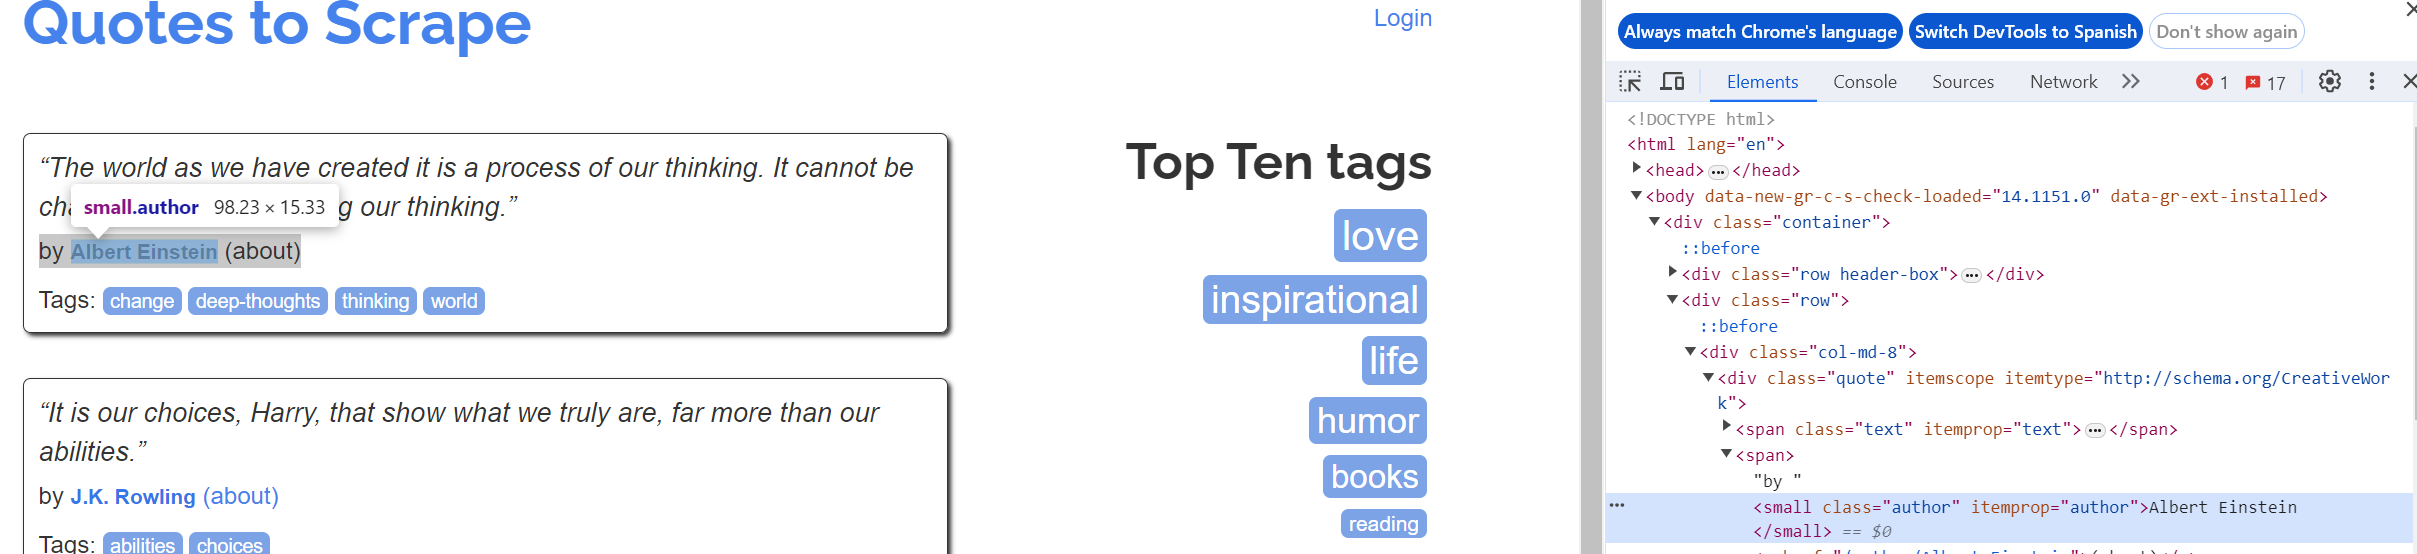

In [11]:
from IPython.display import Image
Image(filename='scraping3.png')

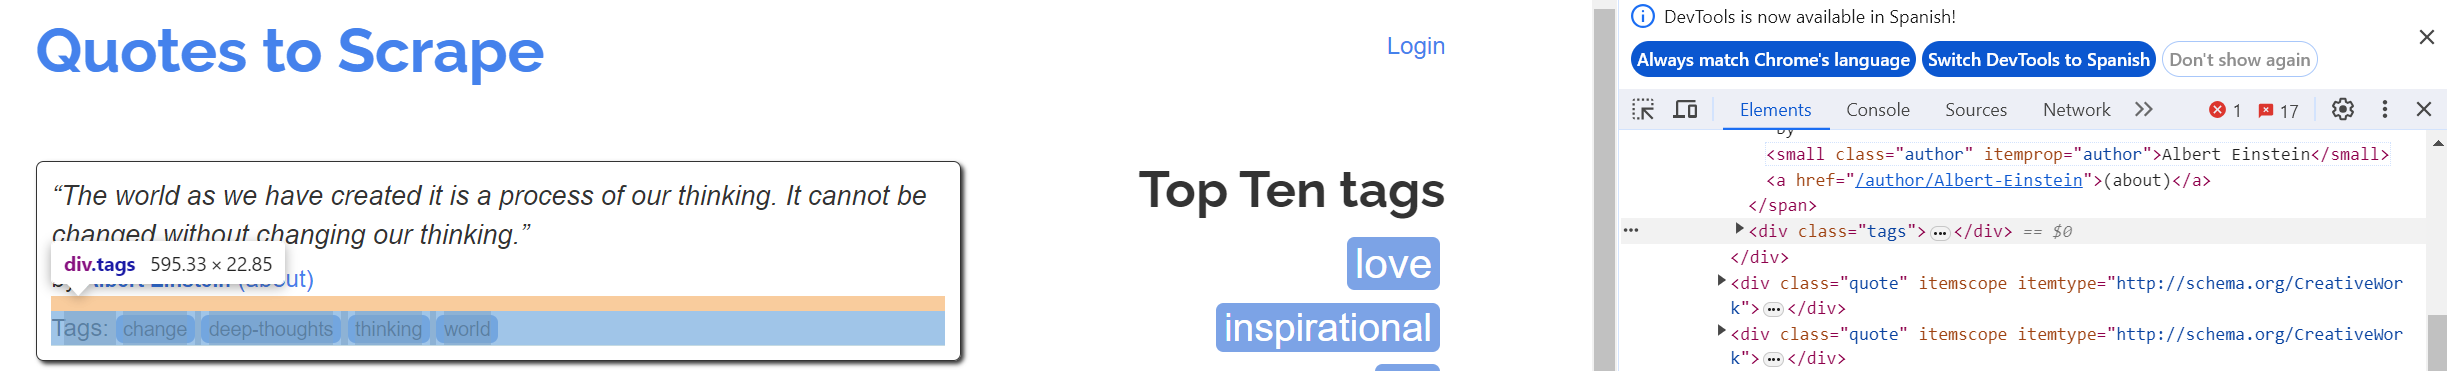

In [12]:
from IPython.display import Image
Image(filename='scraping4.png')

El codi HTML presenta una estructura clara i organitzada que facilita l'extracció de paraules clau i enllaços relacionats amb temes específics. Utilitzant un element div amb la classe tags, agrupa diversos elements que representen etiquetes o 'tags' associats amb el contingut de la pàgina. Els elements a amb la classe tag són particularment útils per al scraping, ja que cada un conté un enllaç a una pàgina específica (indicat pel seu atribut href) i el text de l'etiqueta corresponent (com "change", "deep-thoughts", etc.)

A partir d'aquesta informació, definirem el codi per fer l'scraping corresponent.

In [1]:
# Importem les llibreries necessàries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Establim la URL de la pàgina web en la qual volem fer scraping
url = "http://quotes.toscrape.com"

# Fem una sol·licitud HTTP GET a la URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Trobem totes les cites, autors i etiquetes
quotes = [quote.text.strip() for quote in soup.find_all('span', class_='text')]
authors = [author.text.strip() for author in soup.find_all('small', class_='author')]
tags = [[tag.text for tag in tag_div.find_all('a', class_='tag')] for tag_div in soup.find_all('div', class_='tags')]

# Creem un dataframe
df_quotes = pd.DataFrame({
    'Quote': quotes,
    'Author': authors,
    'Tags': tags
})

# Guardem el dataframe com a fitxer CSV
df_quotes.to_csv('quotes_data.csv', index=False)


In [3]:
df_quotes # Mirem els resultats

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"[adulthood, success, value]"
6,“It is better to be hated for what you are tha...,André Gide,"[life, love]"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"[edison, failure, inspirational, paraphrased]"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,[misattributed-eleanor-roosevelt]
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"[humor, obvious, simile]"


Com podem veure, hem obtingut cada cita amb 3 etiquetes: "Quote" (la cita en si), "Author" (l'autor de la cita) i "Tags" (la temàtica de la cita).

Ara anem a fer el mateix amb el web de wikipedia, concretament l'enllaç: https://en.wikipedia.org/wiki/Wikipedia:Selected_anniversaries


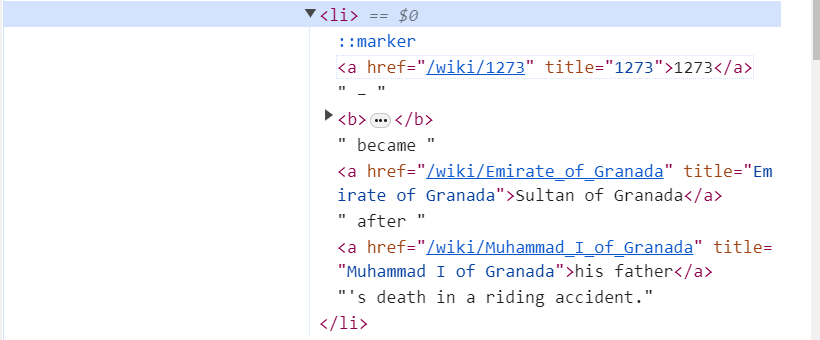

In [14]:
from IPython.display import Image
Image(filename='scraping5.png')

Incloem també una imatge de la informació que volem extreure perquè es vegi més clarament:

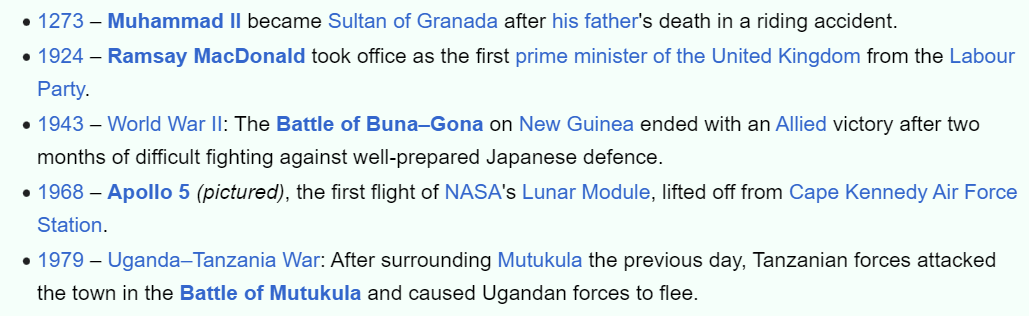

In [15]:
from IPython.display import Image
Image(filename='scraping6.png')

El codi HTML comença amb un element 'li', que representa un ítem d'una llista. Aquest ítem inclou enllaços ('a') que contenen referències a altres pàgines de Wikipedia, com ara l'any "1273" i la pàgina del "Sultanat de Granada", amb el text visible associat que proporciona context. A l'extracció d'aquestes dades, volem separar l'any del text restant per a un anàlisi estructurat. Això es pot aconseguir aplicant un mètode 'strip' sobre l'element que conté l'any, o utilitzant expressions regulars o altres tècniques de parsing per a aïllar l'any del text descriptiu que segueix.

Concretament, el que farem és iterar sobre cada element 'li' dins de la secció d'aniversaris seleccionats de la pàgina web. Per a cada ítem, primer buscarem l'enllaç ('a') que conté l'any, identificable pel seu atribut 'title' que és numèric. Un cop trobat l'any, l'extraurem i utilitzarem el mètode 'strip' per eliminar espais extres. Després, obtindrem el text complet de l'ítem i, utilitzant el mètode 'replace', eliminarem l'aparició de l'any d'aquest text, deixant només la descripció de l'esdeveniment. 

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Establim la URL de la pàgina web de la qual volem fer scraping
url = "https://en.wikipedia.org/wiki/Wikipedia:Selected_anniversaries"

# Fem una sol·licitud HTTP GET a la URL
response = requests.get(url)

# Llistes per emmagatzemar les dades
years = []
texts = []

if response.status_code == 200:
    # Analitzar el contingut HTML de la resposta amb BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extreiem cada element 'li' dins de la secció d'aniversaris seleccionats
    list_items = soup.find_all('li')
    for item in list_items:
        year_link = item.find('a')
        if year_link and year_link.get('title') and year_link.get('title').isdigit():
            year = year_link.get('title').strip()  # Obtenir l'any
            text = item.get_text(strip=True).replace(year, '', 1).strip()  # Eliminar l'any del text
            
            # Afegir les dades a les llistes
            years.append(year)
            texts.append(text)
else:
    print("Error en la sol·licitud: Status Code", response.status_code)

# Crear un DataFrame amb les dades extretes
df_anniversaries = pd.DataFrame({
    'Year': years,
    'Text': texts
})

# Guardar el DataFrame com a fitxer CSV
df_anniversaries.to_csv('anniversaries_data.csv', index=False)


In [6]:
df_anniversaries # Mirem els resultats

,Year,Text
0,1273,–Muhammad IIbecameSultan of Granadaafterhis fa...
1,1924,–Ramsay MacDonaldtook office as the firstprime...
2,1943,–World War II: TheBattle of Buna–GonaonNew Gui...
3,1968,"–Apollo 5(pictured), the first flight ofNASA's..."
4,1979,–Uganda–Tanzania War: After surroundingMutukul...
5,1264,– KingLouis IX of Franceissued theMise of Amie...
6,1789,– BishopJohn Carrollpurchased a plot of land t...
7,1902,– In the most fatal recorded mountaineering ac...
8,1957,– American inventorFred Morrisonsold the right...
9,2001,– Five peopleattempted to set themselves on fi...


El resultat d'aquest procés és un dataframe que inclou els anys i les descripcions dels esdeveniments destacats, que posteriorment guardem en un fitxer CSV anomenat 'anniversaries_data.csv'. 

Ara farem web scraping del primer web mitjançant Selenium.

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# Especifiquem la ruta del ChromeDriver
PATH_TO_WEBDRIVER = "C:/Users/ariad/Desktop/chromedriver-win64/chromedriver-win64/chromedriver.exe"

# Inicialitzem el servei ChromeDriver
service = Service(executable_path=PATH_TO_WEBDRIVER)
driver = webdriver.Chrome(service=service)

# Obrim la pàgina web
driver.get("http://quotes.toscrape.com")

# Esperem que la pàgina carregui completament
time.sleep(2)

# Extreiem les cites, autors i etiquetes
quotes = driver.find_elements(By.CSS_SELECTOR, "span.text")
authors = driver.find_elements(By.CSS_SELECTOR, "small.author")
tags = [tag.find_elements(By.CSS_SELECTOR, "a.tag") for tag in driver.find_elements(By.CSS_SELECTOR, "div.tags")]

for i in range(len(quotes)):
    print("Quote:", quotes[i].text)
    print("Author:", authors[i].text)
    print("Tags:", [tag.text for tag in tags[i]])
    print()

# Tanquem el navegador un cop acabat
driver.quit()

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']

Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']

Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']

Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']

Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']

Quote: “Try not to become a man of success. Rather become a 

Com podem veure, el codi ha aconseguit navegar automàticament a través del navegador, accedir a la pàgina web especificada i extreure dades específiques.

Ara farem web scraping del segon web mitjançant Selenium.

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# Especifiquem la ruta del ChromeDriver
PATH_TO_WEBDRIVER = "C:/Users/ariad/Desktop/chromedriver-win64/chromedriver-win64/chromedriver.exe"

# Inicialitzem el servei ChromeDriver
service = Service(executable_path=PATH_TO_WEBDRIVER)
driver = webdriver.Chrome(service=service)

# Obrim la pàgina web de Wikipedia: Selected Anniversaries
driver.get("https://en.wikipedia.org/wiki/Wikipedia:Selected_anniversaries")

# Esperem que la pàgina carregui completament
time.sleep(2)

# Extreiem els anniversaris
anniversaries = driver.find_elements(By.CSS_SELECTOR, "ul li")
for item in anniversaries:
    links = item.find_elements(By.CSS_SELECTOR, "a")
    if links:
        for link in links:
            if link.get_attribute('title') and link.get_attribute('title').isdigit():
                year = link.get_attribute('title').strip()
                text = item.text.replace(year, '', 1).strip()
                print("Year:", year)
                print("Text:", text)
                break  # Només considerem el primer enllaç amb un any

# Tanquem el navegador un cop acabat
driver.quit()

Year: 1776
Text: Holidays/observances should be limited to a maximum of 3, but this may increase to accommodate those that do not appear on the same date each year. Holidays should be listed in this order: international observances (secular followed by religious) first (except those that are not serious in nature, e.g., International Talk Like a Pirate Day—these should appear at the end of the list), then alphabetically by country where observed. When the same day is observed in multiple countries (but not worldwide), then the countries should be listed alphabetically, and the first country used for sorting.
Example (note that these are not actually all on the same date, but combined to demonstrate the sorting): Earth Day (2024); Easter (Christianity, 2024); Mother's Day in Belize and Guatemala; Independence Day in the United States (); Star Wars Day
Year: 1776
Text: Example (note that these are not actually all on the same date, but combined to demonstrate the sorting): Earth Day (202

Com podem veure, hem aconseguit extreure amb èxit la informació dels aniversaris seleccionats de la pàgina de Wikipedia. Això ens proporciona una visió detallada i organitzada dels esdeveniments històrics i les celebracions associades a cada any.

# Exercici 2


<b> Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.
A manera d'exemple del que es demana pots consultar aquest enllaç:
->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats. </b>

En primer lloc visualitzem els dataframes obtinguts:

In [13]:
df_quotes.head()

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"


In [14]:
df_anniversaries.head()

,Year,Text
0,1749,– The first issue ofBerlingske(front page pict...
1,1911,–An earthquakeregistering 7.7MwdestroyedAlmaty...
2,1938,– The American health charityMarch of Dimeswas...
3,1961,– All 25 people on boardAero Flight 311died in...
4,2009,– Thecryptocurrencynetwork ofbitcoinwas create...


Mirarem també el tamany de cada dataset (files i columnes) per documentar-ho després.

In [15]:
df_quotes.shape

(10, 3)

In [17]:
df_anniversaries.shape

(10, 2)

També podem mirar el llistat d'autors del dataframe quotes:

In [19]:
list(df_quotes['Author'].unique())

['Albert Einstein',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

I el tipus de tags o etiquetes:

In [21]:
# Utilitzem explode per transformar cada tag en una fila separada
df_tags_exploded = df_quotes.explode('Tags')

# Ara podem veure els tags únics fent servir unique() o value_counts() per veure la freqüència
unique_tags = df_tags_exploded['Tags'].unique()
print(unique_tags)

# O per veure la freqüència de cada tag
tag_counts = df_tags_exploded['Tags'].value_counts()
print(tag_counts)

['change' 'deep-thoughts' 'thinking' 'world' 'abilities' 'choices'
 'inspirational' 'life' 'live' 'miracle' 'miracles' 'aliteracy' 'books'
 'classic' 'humor' 'be-yourself' 'adulthood' 'success' 'value' 'love'
 'edison' 'failure' 'paraphrased' 'misattributed-eleanor-roosevelt'
 'obvious' 'simile']
Tags
inspirational                      3
humor                              2
life                               2
change                             1
obvious                            1
misattributed-eleanor-roosevelt    1
paraphrased                        1
failure                            1
edison                             1
love                               1
value                              1
success                            1
adulthood                          1
be-yourself                        1
classic                            1
deep-thoughts                      1
books                              1
aliteracy                          1
miracles                       

Ara, del dataframe sobre aniversaris, podem visualitzar els diferents anys:

In [22]:
list(df_anniversaries['Year'].unique())

['1749',
 '1911',
 '1938',
 '1961',
 '2009',
 '1698',
 '1798',
 '1936',
 '1989',
 '2004']

A més, hem observat els diferents esdeveniments per classificar-los per temàtiques. La mida limitada del dataset ens ha permès fer-ho així, a partir de la simple lectura de les dades. 

A partir d'aquesta informació, i seguint l'enllaç recomananat com a guia -a més d'altres datasets de Kaggle- s'ha creat el document word/pdf corresponent (consultar-lo en aquest repositori).

# Exercici 3


<b>Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. </b>

Hem escollit la pàgina web de Goodreads, concretament la secció de llibres sobre Data Science: <br>
https://www.goodreads.com/search?q=data+science&qid=

Comencem fent web scraping amb Selenium:

In [44]:
# Importem les llibreries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# Configurem la ruta on es troba el chromedriver
PATH_TO_WEBDRIVER = "C:/Users/ariad/Desktop/chromedriver-win64/chromedriver-win64/chromedriver.exe"

# Inicialitzem el webdriver amb la classe Service
service = Service(executable_path=PATH_TO_WEBDRIVER)
driver = webdriver.Chrome(service=service)

# Obrim la pàgina web
driver.get("https://www.goodreads.com/search?q=data+science&qid=")

# Esperem a que la pàgina carregui completament
time.sleep(5)

# Trobem tots els blocs de llibres
book_blocks = driver.find_elements(By.CSS_SELECTOR, "tr[itemtype='http://schema.org/Book']")

# Processem cada bloc per separar títols i autors
books = []
for block in book_blocks:
    title_element = block.find_element(By.CSS_SELECTOR, "span[itemprop='name']")
    title = title_element.text.strip() if title_element else "Títol desconegut"

    # Intentar trobar l'element que conté el text complet dels autors
    author_elements = block.find_elements(By.XPATH, ".//div[@class='authorName__container']/a[@class='authorName']")
    authors = ', '.join([author.text.strip() for author in author_elements]) if author_elements else "Autor desconegut"

    books.append({"title": title, "author": authors})

# Mostrem els resultats
for book in books:
    print(f"Títol: {book['title']}")
    print(f"Autor: {book['author']}")
    print("-------------------------------------------------")

# Tanquem el navegador un cop acabat
driver.quit()

Títol: Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking
Autor: Foster Provost, Tom Fawcett
-------------------------------------------------
Títol: Data Smart: Using Data Science to Transform Information into Insight
Autor: John W. Foreman
-------------------------------------------------
Títol: Data Science from Scratch: First Principles with Python
Autor: Joel Grus
-------------------------------------------------
Títol: Machine Learning For Absolute Beginners: A Plain English Introduction (Second Edition)
Autor: Oliver Theobald
-------------------------------------------------
Títol: Numsense! Data Science for the Layman: No Math Added
Autor: Annalyn Ng, Kenneth Soo
-------------------------------------------------
Títol: Doing Data Science: Straight Talk from the Frontline
Autor: Cathy O'Neil, Rachel Schutt
-------------------------------------------------
Títol: Python Data Science Handbook: Essential Tools for Working with Data
Autor: 

Ara farem scraping de la pàgina web:
https://www.bbcgoodfood.com/recipes/collection/vegan-recipes
amb l'objectiu d'extreure una llista de receptes veganes.

Primer de tot instal.lem Scrapy:

In [2]:
!conda install scrapy -y

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



Ara importem les llibreries necessàries:

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess

Ara creem un nou projecte de Scrapy:

In [1]:
!scrapy startproject bbcgoodfood_scraper

New Scrapy project 'bbcgoodfood_scraper', using template directory 'C:\Users\ariad\anaconda3\Lib\site-packages\scrapy\templates\project', created in:
    C:\Users\ariad\Desktop\IT ACADEMY\ESPECIALITZACIÓ\SPRINT 10\bbcgoodfood_scraper

You can start your first spider with:
    cd bbcgoodfood_scraper
    scrapy genspider example example.com


Ara definim l'Spider:

In [2]:
class BBCGoodFoodSpider(scrapy.Spider):
    name = 'bbcgoodfood'
    start_urls = ['https://www.bbcgoodfood.com/recipes/collection/vegan-recipes']

    def parse(self, response):
        for recipe in response.css('h2.heading-4'):
            yield {
                'title': recipe.css('::text').get(),
            }


Aquest codi ha creat un spider anomenat bbcgoodfood que comença a extreure dades de l'URL proporcionada. Busca tots els elements h2 amb la classe heading-4, que corresponen als títols de les receptes en la pàgina i extreu el text d'aquests elements.

Configurem l'arxiu settings.py (es troba dins de la carpeta creada pel projecte) indicant que ignori la restricció en l'ús de robots, és a dir canviant el valor de True a False:
ROBOTSTXT_OBEY = False

Ara fem l'scraping de la pàgina web:

In [4]:
import scrapy
from scrapy.crawler import CrawlerProcess

class BBCGoodFoodSpider(scrapy.Spider):
    name = 'bbcgoodfood'
    start_urls = ['https://www.bbcgoodfood.com/recipes/collection/vegan-recipes']

    def parse(self, response):
        for recipe in response.css('h2.heading-4'):
            yield {
                'title': recipe.css('::text').get(),
            }

# Configuració del procés de rastreig amb la sortida a un arxiu JSON
process = CrawlerProcess(settings={
    'FEEDS': {
        'recipes.json': {
            'format': 'json',
            'encoding': 'utf8',
        },
    },
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
})

# Iniciar el procés de rastreig
process.crawl(BBCGoodFoodSpider)
process.start()


2024-01-22 11:10:38 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: scrapybot)
2024-01-22 11:10:38 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.4, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.10.0, Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 23.2.0 (OpenSSL 3.2.0 23 Nov 2023), cryptography 41.0.7, Platform Windows-10-10.0.22621-SP0
2024-01-22 11:10:38 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
2024-01-22 11:10:38 [py.warnings] WARNING: C:\Users\ariad\anaconda3\Lib\site-packages\scrapy\utils\request.py:232: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQ

Finalment, visualitzem els resultats de l'arxiu recipes.json creat:

In [5]:
import json

# Defineix la ruta de l'arxiu JSON
file_path = 'recipes.json'

# Obrir l'arxiu JSON i llegir les dades
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Mostrar les dades
for recipe in data:
    print(recipe)


{'title': 'Sweet potato & peanut curry'}
{'title': 'Vegan jambalaya'}
{'title': 'Easy vegan wellington'}
{'title': 'Vegan chilli'}
{'title': 'Cranberry, orange & rosemary sauce'}
{'title': 'Simple sweet & sour slow-cooker red cabbage'}
{'title': 'Vegan Christmas pudding'}
{'title': 'Crispy banana fritters (pisang goreng wijen)'}
{'title': 'Slow-cooker pumpkin soup'}
{'title': 'Vegan simnel cake'}
{'title': 'Vegan mayonnaise'}
{'title': 'No-bake flapjacks'}
{'title': 'Vegan chickpea curry jacket potatoes'}
{'title': 'Easy vegan pancakes'}
{'title': 'Vegan scones'}
{'title': 'Speedy lentil coconut curry'}
{'title': 'Hasselback potatoes'}
{'title': 'Vegan burritos'}
{'title': 'Vegan banana muffins'}
{'title': 'Roasted aubergine & tomato curry'}
{'title': 'Vegan sausage rolls'}
{'title': 'App only'}
{'title': 'Vegan chocolate party traybake'}
{'title': 'Vegan trifle'}
{'title': 'Christmas Subscription Offer'}


Com podem veure, se'ns ha creat una llista amb els noms de les receptes de la pàgina web.

Ara creem un arxiu .csv a partir del .json i el visualitzem com a dataframe amb Pandas:

In [1]:
import pandas as pd

# Llegir l'arxiu JSON en un DataFrame
df = pd.read_json('recipes.json')

# Visualitzar el DataFrame
print(df)

                                           title
0                    Sweet potato & peanut curry
1                                Vegan jambalaya
2                          Easy vegan wellington
3                                   Vegan chilli
4             Cranberry, orange & rosemary sauce
5    Simple sweet & sour slow-cooker red cabbage
6                        Vegan Christmas pudding
7   Crispy banana fritters (pisang goreng wijen)
8                       Slow-cooker pumpkin soup
9                              Vegan simnel cake
10                              Vegan mayonnaise
11                             No-bake flapjacks
12          Vegan chickpea curry jacket potatoes
13                           Easy vegan pancakes
14                                  Vegan scones
15                   Speedy lentil coconut curry
16                           Hasselback potatoes
17                                Vegan burritos
18                          Vegan banana muffins
19              Roas

Amb el dataframe actual, que conté els títols de les receptes veganes de la pàgina web de BBC Good Food, tenim diverses opcions per ampliar i enriquir les nostres dades. Una possibilitat és extreure més informació sobre cada recepta, com ara ingredients, temps de cocció, i valoracions, adaptant l'spider per capturar aquesta informació addicional. 